In [ ]:
%%html
<style>
table {display: inline-block}
td {text-align:left}
</style>


# Recursion (two weeks)

## Python Programming for Engineers
### Tel-Aviv University / 0509-1820 / Fall 2025-2026

## Agenda  

### Recursion


### Lecture reminder - the recursive approach

|||
|:--|:--|
|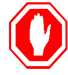|Base (termination) condition|
|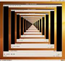|Decomposition to smaller instances|
|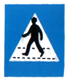|Use solutions of smaller instances to solve the original problem|

## Sublist Sum

Given a **list** of <u>positive</u> numbers and a number **target**, we want to check if there exist a sub-list of numbers such that the sum of its elements is **target**.

- For example:  

    |Input|Output|
    |:--|:--|
    |numbers = [1,3,2,4], target = 7  | True
    |numbers = [1,1,1,12], target = 15 | True
    |numbers = [1,2,3], target = 10 | False
    |numbers = [14, 15], target = 13 | False
    |<div style='font-weight:bold'>Edge cases:</div>|
    |numbers = [], target = 0 | True
    |numbers = [], target != 0 | False

### Sublist Sum - the recursive approach

- **Base:** What’s the easiest problem? An empty list!

- **Decomposition:** What’s an easier problem? A shorter list!

- For example: numbers = [10,2,3,1], target = 5
    - There are two options for the last item in numbers:
        - **It belongs to the sub-list** that sums up to 5. In this case, we are left with a smaller problem: numbers = [10,2,3], target = 5-1=4
        - **It does not belong to the sub-list**. In this case, the smaller problem is: numbers = [10,2,3], target = 5
    - If **either** of these options is *True*, there is a solution and the result would be *True*.
   

### Sublist Sum - Python recursive implementation

In [ ]:
def sublist_sum(numbers, target):
    if target == 0:
        return True  # Since an empty list sums up to zero
    elif len(numbers)==0:
        return False # Since we are here ONLY if target > 0
    elif target < 0: # Our list contains only POSITIVE numbers
        return False
    else:
        option1 = sublist_sum(numbers[:-1], target-numbers[-1])
        option2 = sublist_sum(numbers[:-1], target)
        return option1 or option2

In [ ]:
print(sublist_sum([1,3,7], 9))
print(sublist_sum([1,3,7], 10))

## River cruise

Objective: you want to cruise strictly (i.e. monothonically) down the Amazon river <span style='color:red'>at minimal cost</span>.
- Along the river there are **boat stations 1..N**
    - You can rent and return a boat at each station.
    - Renting a boat at station *i* and returning it at station *j* costs `P[i,j]>0` (int, given price list).
    - Switching boat costs 0.

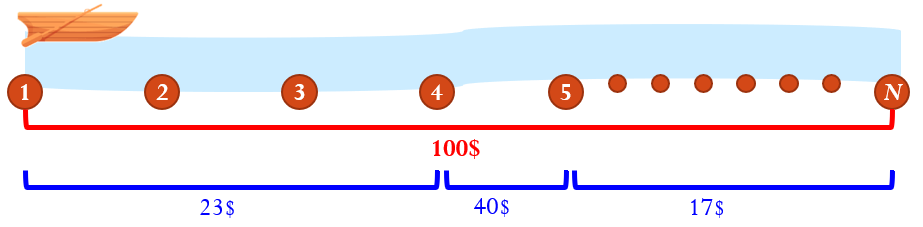</img>


- What if we chek all options for switching midway?
    - In each midway station, swtich at station or not
    - **$2^{N-2}$ options!**

- Sub-optimality property:
    - You want to travel from start station $s$ to $N$
    - Suppose you know best cost from $s+1,s+1,s+1,...,N-1$ to $N$
    - First travel directly from *s* to *j*, then continue through optimal route from j to N


- <span >**Formally: $best(s,N)=\min\limits_{j=s+1,s+2,...,N}(P[s,j]+best(j,N))$**</span>
    
    

#### We can see that the structure of sub-optimality is already recursive!

Before implementing, let's build a recursion tree

### Recursion tree for N=5

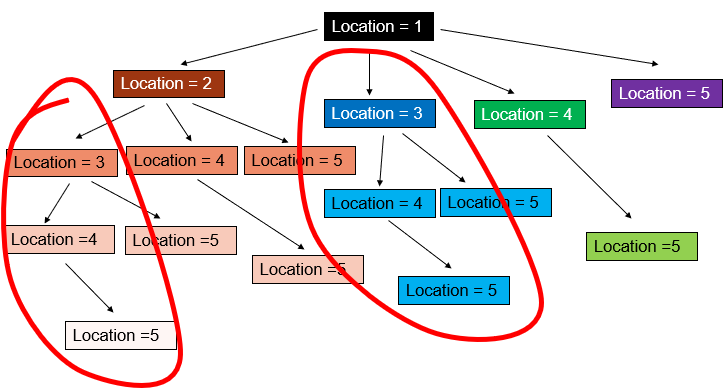

### Rive cruise - Python recursive implementation

In [ ]:
# prices = dictionary which holds 𝑃.
def optimal_cost(N, prices, s = 1): 
    if s == N: # STOP
        return 0
    
    # For each i, check optimal cost with switching at station i
    options = []
    for i in range(s+1, N+1):
        best_i_N = optimal_cost(N, prices, i) # DECOMPOSITION
        options.append(prices[(s, i)] + best_i_N)

    # Take the optimal (minimum) cost of all options
    result = min(options) # AGGREGATION
    return result

In [ ]:
# Creating a random price list
def make_random_prices(N):
    import random
    res=[[int(random.random()*100) if a<b else 0 if a==b else -1 for b in range(N)] for a in range(N)]
    res={(a+1,b+1): res[a][b] for b in range(N) for a in range(N) if a<=b}
    return res

In [ ]:
N = 5
prices = make_random_prices(N)
res=optimal_cost(N, prices, 1)

print(f'optimal results : {res}')

In [ ]:
N = 10
prices = make_random_prices(N)
res=optimal_cost(N, prices, 1)

print(f'optimal results : {res}')

## Merge sort

The idea behind merge sort: 
- We can sort a list by splitting it into two shorted lists, sort each one of them, and merge them.

### Let's start from writing code for merging two <u>sorted</u> list

In [ ]:
def merge(left, right):
    merged_list = []
    left_i, right_i = 0, 0
    while left_i < len(left) and right_i < len(right):
        if left[left_i] <= right[right_i]:
            merged_list.append(left[left_i])
            left_i += 1
        else:
            merged_list.append(right[right_i])
            right_i += 1

    # copy remaining:
    merged_list += left[left_i:] + right[right_i:]
    return merged_list 

<span style='color:purple'><b>(8): Assuming `len(right)=5`, `len(left)=3`, how many iterations are there in the `while` loop?</b></span> 

### Merge sort: the recusion idea

- **Stop condition (stop)**: a list with one element
- **Recursion reduction (decomposition)**:  partition the list to two halves, sort each half recursively
- **Recusion step (aggregation)**: merge the sorted sub-lists to a single sorted list

### Merge sort: implementation

In [ ]:
def mergesort(lst):
    if len(lst) <= 1: # STOP
        return lst

    middle = len(lst) // 2 
    left = mergesort(lst[ : middle]) # DECOMPOSITION
    right = mergesort(lst[middle : ]) # DECOMPOSITION
    merged_list = merge(left, right) # USE
    return merged_list 

In [ ]:
print(mergesort([3,1,7,137,132,731]))

<span style='color:purple'><b>(9) Assuming `len(lst)=16`, what is the "depth" of the recursion tree?</b></span> 

# Self Learning

## Questions from previous exams

Open [Exam 2023-2024 semester A Moed A](https://courses.cs.tau.ac.il/pyProg/2526a/exams/exam2324a_moedA.pdf) and answer questions 1.C - 1.E.

#### Solutions

1.C

In [ ]:
def integral_im_cord(im, x, y):
    if x < 0 or y < 0:
        return 0
    return im[x][y] + integral_im_cord(im, x, y - 1) + integral_im_cord(im, x - 1, y) - integral_im_cord(im, x - 1, y - 1)

In [ ]:
integral_im_cord([[1,2],[3,4]],1,1)

1.D

In [ ]:
def intergral_im(im):
    out = [[0] * len(im) for i in range(len(im))]
    for i in range(len(im)):
        for j in range(len(im)):
            out[i][j] = im[i][j]
            if i > 0:
                out[i][j] += out[i - 1][j]
            if j > 0:
                out[i][j] += out[i][j - 1]
            if i > 0 and j > 0:
                out[i][j] -= out[i - 1][j -1]
    return out

In [ ]:
intergral_im([[1,2],[3,4]])

1.E

1. Expected: 138, Actual: 1

2. Fix: `if y%2` $\Rightarrow$ `if y%2==0`

3. 5




Open [Exam 2023-2024 semester A Moed B](https://courses.cs.tau.ac.il/pyProg/2526a/exams/exam2324a_moedB.pdf) and answer questions 1.C - 1.D.

#### Solutions

1.C.1

In [ ]:
def select_presents(presents, min_budget, max_budget):
    counter=0
    for target in range(min_budget, max_budget+1):
        counter+=sublist_sum(presents, target)
    return counter

def sublist_sum(lst, target):
    if len(lst)== 0:
        return target==0
    else:
        return sublist_sum(lst[1:],target) + sublist_sum(lst[1:],target- lst[0][0])


In [ ]:
print(select_presents( [(10,2),(50,1),(20,3),(100,5)], 81, 99 ))
print(select_presents ([(10,2),(50,1),(20,3),(100,5)], 20, 35 ))

1.C.2

In [ ]:
def merge_lists_of_gifts(left, right):
    merged_list = []
    left_i, right_i = 0, 0
    while left_i < len(left) and right_i < len(right):
        if left[left_i][1]/ left[left_i][0] <= right[right_i][1]/right[right_i][0]:
            merged_list.append(left[left_i])
            left_i += 1
        else:
            merged_list.append(right[right_i])
            right_i += 1
            
    merged_list += left[left_i:] + right[right_i:]
    return merged_list

In [ ]:
print(merge_lists_of_gifts([(50,1), (10,2)],[(100,5), (20,3)]))

1.C.3

In [ ]:
def merge_sort(lst):
    if len(lst) <= 1:
        return lst
    middle = len(lst) // 2
    left = merge_sort(lst[ : middle])
    right = merge_sort(lst[middle : ])
    merged_list = merge_lists_of_gifts(left, right)
    return merged_list

In [ ]:
l1= [(1,3),(2,2),(2,1)]
merge_sort(l1)

1.D

In [ ]:
l1= [(1,3),(2,2),(2,1)]
l2= merge_sort(l1)
print(sum([l1[a][1]-l2[-a][0] for a in range(len(l1))]))

## Bonus: The n-queens problem

The n-queens problem is about finding how many different ways queens can be placed on a chessboard so that none attack each other

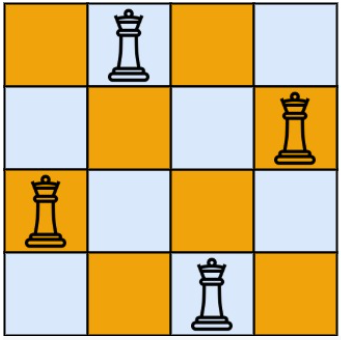

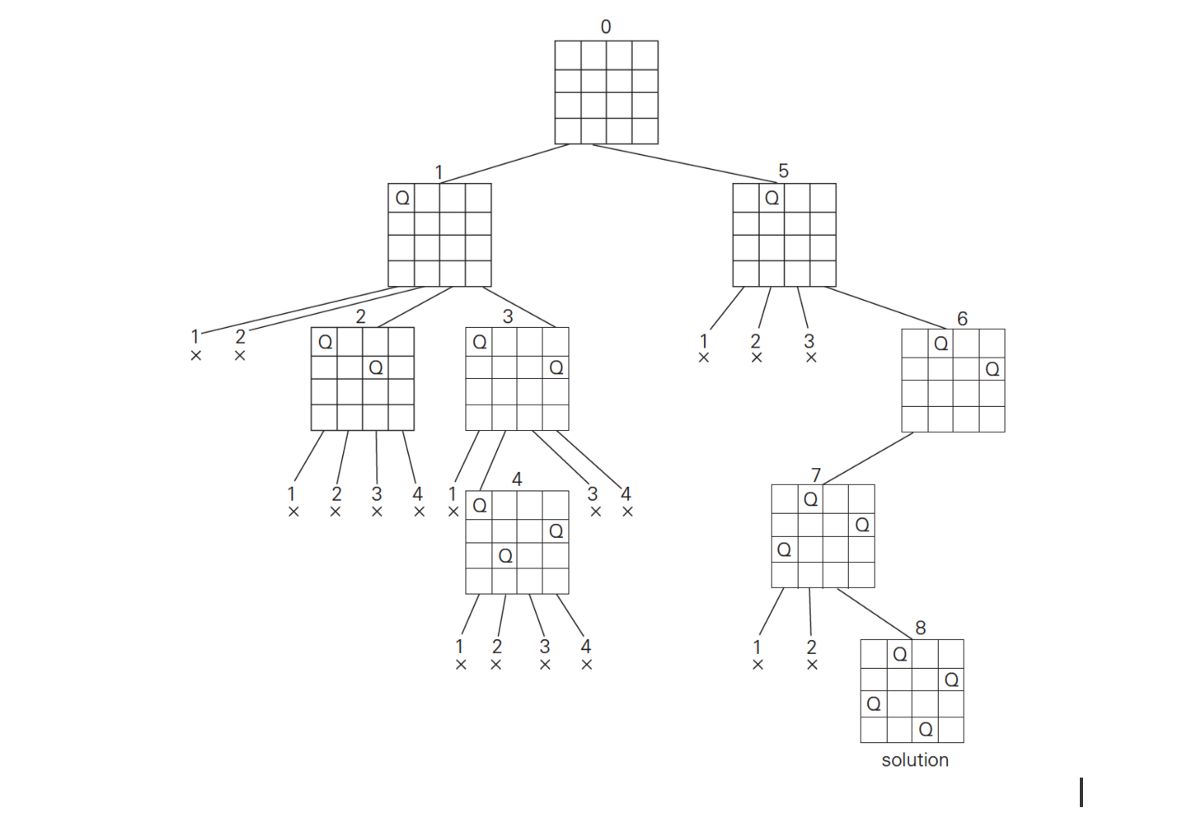

For implemetation details see [here](https://www.geeksforgeeks.org/n-queen-problem-backtracking-3/)